In [1]:
%matplotlib inline

import seaborn
import numpy as np
import matplotlib.pyplot as plt
# plt.figure(figsize=(16, 9))
import pandas as pd

In [2]:
data = pd.read_csv("average.csv")

In [3]:
data

,ID,gender,dir,degree,average
0,104308013,1,1,1,929.17460
1,104308013,1,1,2,1381.90830
2,104308013,1,1,3,1887.43590
3,104308013,1,1,4,1813.58880
4,104308013,1,2,1,1565.84510
...,...,...,...,...,...
363,107702056,1,1,4,1735.59900
364,107702056,1,2,1,1167.80020
365,107702056,1,2,2,1265.74235
366,107702056,1,2,3,1510.41480


In [4]:
data.describe()

,ID,gender,dir,degree,average
count,3.680000e+02,368.000000,368.000000,368.000000,368.000000
mean,1.070439e+08,1.652174,1.500000,2.500000,1678.932559
std,9.807958e+05,0.476929,0.500681,1.119556,524.573234
min,1.043080e+08,1.000000,1.000000,1.000000,614.457800
25%,1.062090e+08,1.000000,1.000000,1.750000,1291.883900
50%,1.077020e+08,2.000000,1.500000,2.500000,1693.468150
75%,1.077020e+08,2.000000,2.000000,3.250000,2079.860250
max,1.077021e+08,2.000000,2.000000,4.000000,3052.426200


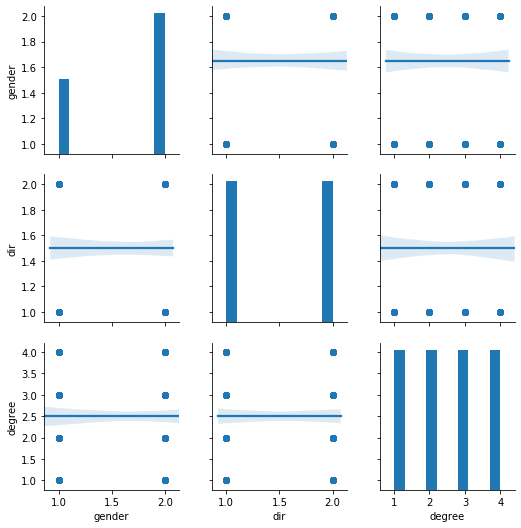

In [5]:
seaborn.pairplot(data, vars=['gender', 'dir', 'degree'], kind='reg')

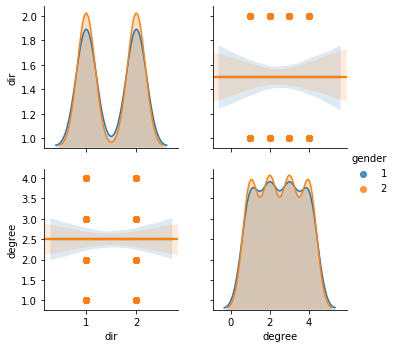

In [6]:
seaborn.pairplot(data, vars=['dir', 'degree'], kind='reg', hue='gender')

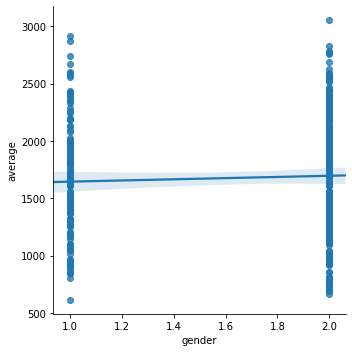

In [7]:
seaborn.lmplot(y='average', x='gender', data=data)

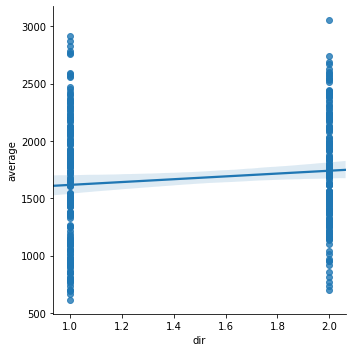

In [8]:
seaborn.lmplot(y='average', x='dir', data=data)

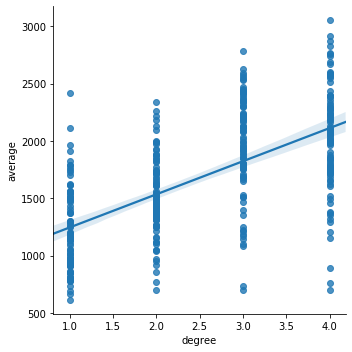

In [9]:
seaborn.lmplot(y='average', x='degree', data=data)

In [10]:
data.groupby("gender").mean()

,ID,dir,degree,average
gender,,,,
1,1.071780e+08,1.5,2.5,1645.410358
2,1.069723e+08,1.5,2.5,1696.811066


In [11]:
male = (data['gender'] == 1)
female = (data['gender'] == 2)

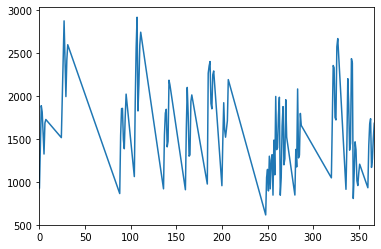

In [12]:
data['average'][male].plot()

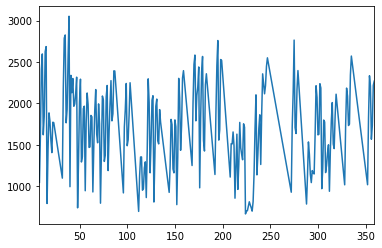

In [13]:
data['average'][female].plot()

In [14]:
from statsmodels.formula.api import ols

In [15]:
model = ols("average ~ gender + dir + degree", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     79.76
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           1.13e-39
Time:                        05:09:06   Log-Likelihood:                -2733.3
No. Observations:                 368   AIC:                             5475.
Df Residuals:                     364   BIC:                             5490.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.8083    110.895      6.184      0.0